# Pengambilan Data Twitter

In [3]:
import tweepy
import csv
import sys
import re
import pandas as pd
import numpy as np
import string
import datetime
import time

C:\Users\HP\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [ ]:
access_token = "1453638487106748422-1nZ6kd8UHSdpMhbRVBDb5TZlgZzLGg"
access_token_secret = "Zg2kSmQHORGVu7j2priaAeu0R8VYNbWoLo9nq6Vjq8rdp"
api_key = "RQ2hQDH5d4uilly17NReVlQjs"
api_key_secret = "VS0KGnnvRwpIkzQOLCfjIPshvwq91g1yJOMSohSldXBY0rLy4t"

auth = tweepy.OAuthHandler(api_key, api_key_secret)
api = tweepy.API(auth)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

search_key = "telkomsel"
maxTweets = 2000
tweetsPerQry = 10

csvFile = open("hasil_20April.csv","a+")
csvWriter = csv.writer(csvFile)

for tweet in tweepy.Cursor(api.search_tweets, q=search_key, lang="id").items(maxTweets):
    csvWriter.writerow([tweet.created_at, tweet.text.encode('utf-8')])
csvFile.close()

print("Download beberapa tweet".format(maxTweets))

# Preprocessing Data Twitter

In [5]:
import tweepy
import csv
import numpy as int64
import pandas as pd
import datetime
import nltk
import emoji, re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [6]:
data = pd.read_csv("hasil_20April.csv", names=['tanggal','tweet']).dropna()
data.head()

,tanggal,tweet
0,2022-04-20 15:27:28+00:00,b'@scorpeeoss aku pk Telkomsel 25-29k perbulan...
1,2022-04-20 15:25:44+00:00,b'@yunointherain Oke Kak. Gyan cek dulu DM nya...
2,2022-04-20 15:25:43+00:00,b'@Telkomsel udah min cek dmnya yaa';;;;
3,2022-04-20 15:23:59+00:00,b'@iskameraa Oke Kak. Gyan cek dulu DM nya ya....
4,2022-04-20 15:23:58+00:00,b'@Telkomsel sudah ada di dm kakak :)';;;;


In [7]:
def remove_usernames_links(text):
    text = re.sub(r'https\:.*$', ":", text)
    return text
data['tweet'] = data['tweet'].apply(remove_usernames_links)

In [8]:
def number_remove(text):
    text = re.sub(r'\d+', '', text)
    return text

def regex_remove(text):
    reg = "b'"
    return re.sub(reg, " ", text)

def url_remove(text):
    text = text.encode('ascii', 'replace').decode('ascii')
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    return text

def remove_regex(text):
    reg = "RT" 
    return re.sub(reg, " ", text)

def punc_remove(text):
    pattern = "[^\b'\@\w]"
    return re.sub(pattern, " ", text)

def white_space(text):
    return re.sub('\s+', ' ', text)

cleaned = []

def clean_text(text):
    for i in text:
        cleaned.append(number_remove(regex_remove(url_remove(remove_regex(punc_remove(white_space(re.sub("[\n\r\t\xa0]"," ",i).strip())))))))
clean_text(data["tweet"])

In [9]:
data['text'] = cleaned
data.head(10)

,tanggal,tweet,text
0,2022-04-20 15:27:28+00:00,b'@scorpeeoss aku pk Telkomsel 25-29k perbulan...,aku pk Telkomsel k perbulan udh sama Disney '
1,2022-04-20 15:25:44+00:00,b'@yunointherain Oke Kak. Gyan cek dulu DM nya...,Oke Kak Gyan cek dulu DM nya ya Makasih Gyan'
2,2022-04-20 15:25:43+00:00,b'@Telkomsel udah min cek dmnya yaa';;;;,udah min cek dmnya yaa'
3,2022-04-20 15:23:59+00:00,b'@iskameraa Oke Kak. Gyan cek dulu DM nya ya....,Oke Kak Gyan cek dulu DM nya ya Makasih Gyan'
4,2022-04-20 15:23:58+00:00,b'@Telkomsel sudah ada di dm kakak :)';;;;,sudah ada di dm kakak '
5,2022-04-20 15:23:33+00:00,b'TELKOMSEL MAHAL BGT ANJIR KUOTANYA NANGISSSS...,TELKOMSEL MAHAL BGT ANJIR KUOTANYA NANGISSSSSA
6,2022-04-20 15:23:33+00:00,b'Pensiunan Dosen di Purwokerto Menangkan Toyo...,Pensiunan Dosen di Purwokerto Menangkan Toyot...
7,2022-04-20 15:23:11+00:00,b'@koacikriyuk Waduh Maafin ya Kak. Sulis lagi...,Waduh Maafin ya Kak Sulis lagi memastikan ga...
8,2022-04-20 15:21:55+00:00,b'@summerbrxxze Halo kak Elfu Terimakasih atas...,Halo kak Elfu Terimakasih atas apresiasinya ...
9,2022-04-20 15:21:32+00:00,b'Barusan nyuruh DM... \nTp di PHP in \xf0\x9...,Barusan nyuruh DM nTp di PHP in xf xf x x xf ...


In [10]:
def remove_punctuation(text):
    return text.translate(str.maketrans("","",string.punctuation))

data['text'] = data['text'].apply(remove_punctuation)

# Case Folding

In [11]:
data['text'] = data['text'].str.lower()

# Tokenizing

In [12]:
def tokenizing(text):
    return word_tokenize(text)
data['text'] = data['text'].apply(tokenizing)

# Stopword

In [13]:
from nltk.corpus import stopwords
list_stopwords = stopwords.words('indonesian')
list_stopwords = (["b", "xef", "x", "xa","n", "xe", "xf","xb", "xad", "xd","xxxxxxx",
                  "xba", "xc", "k", "xcche", "xd xd xaa xd xd xd xd", "m", "t", "xbb", "f",
                  "xbf","xbd","xbc","xab"])

list_stopwords = set(list_stopwords)

def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

data['text'] = data['text'].apply(stopwords_removal)


print(data['text'].head(100))

0     [aku, pk, telkomsel, perbulan, udh, sama, disney]
1     [oke, kak, gyan, cek, dulu, dm, nya, ya, makas...
2                          [udah, min, cek, dmnya, yaa]
3     [oke, kak, gyan, cek, dulu, dm, nya, ya, makas...
4                           [sudah, ada, di, dm, kakak]
                            ...                        
95    [halo, kak, ada, yg, bisa, sulis, bantu, sulis...
96                  [telkomsel, bapuk, bgt, sih, tolol]
97    [coba, lgsg, dtg, ke, gerai, telkomsel, aja, k...
98    [hendrazm, oke, kak, gyan, cek, dulu, dm, nya,...
99                               [min, tolong, cek, dm]
Name: text, Length: 100, dtype: object


# Normalisasi

In [14]:
normalizad_word = pd.read_excel("normalisasi.xlsx")

normalizad_word_dict = {}

for index, row in normalizad_word.iterrows():
    if row[0] not in normalizad_word_dict:
        normalizad_word_dict[row[0]] = row[1] 

def normalized_term(document):
    return [normalizad_word_dict[term] if term in normalizad_word_dict else term for term in document]

data['text'] = data['text'].apply(normalized_term).str.join(" ")
data['text'].head(100)

0         aku pakai telkomsel perbulan udah sama disney
1          oke kak gyan cek dulu dm nya ya makasih gyan
2                               sudah min cek dmnya yaa
3          oke kak gyan cek dulu dm nya ya makasih gyan
4                                 sudah ada di dm kakak
                            ...                        
95    halo kak ada yang bisa sulis bantu sulis siap ...
96                     telkomsel bapuk banget sih tolol
97    coba langsung datang ke gerai telkomsel saja k...
98    hendrazm oke kak gyan cek dulu dm nya ya makas...
99                                    min tolong cek dm
Name: text, Length: 100, dtype: object

# Stemming

In [15]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}

for document in data['text']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '
            
print(len(term_dict))
print("------------------------")

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term,":" ,term_dict[term])
    
print(term_dict)
print("------------------------")

def get_stemmed_term(document):
    return [term_dict[term] for term in document]

tweet_stemmer = data['text'].apply(get_stemmed_term)
print(tweet_stemmer)

27
------------------------
a : a
k : k
u : u
  : 
p : p
i : i
t : t
e : e
l : l
o : o
m : m
s : s
r : r
b : b
n : n
d : d
h : h
y : y
g : g
c : c
j : j
w : w
z : z
f : f
v : v
x : x
q : q
{'a': 'a', 'k': 'k', 'u': 'u', ' ': '', 'p': 'p', 'i': 'i', 't': 't', 'e': 'e', 'l': 'l', 'o': 'o', 'm': 'm', 's': 's', 'r': 'r', 'b': 'b', 'n': 'n', 'd': 'd', 'h': 'h', 'y': 'y', 'g': 'g', 'c': 'c', 'j': 'j', 'w': 'w', 'z': 'z', 'f': 'f', 'v': 'v', 'x': 'x', 'q': 'q'}
------------------------
0        [a, k, u, , p, a, k, a, i, , t, e, l, k, o, m,...
1        [o, k, e, , k, a, k, , g, y, a, n, , c, e, k, ...
2        [s, u, d, a, h, , m, i, n, , c, e, k, , d, m, ...
3        [o, k, e, , k, a, k, , g, y, a, n, , c, e, k, ...
4        [s, u, d, a, h, , a, d, a, , d, i, , d, m, , k...
                               ...                        
25045    [h, a, i, , k, a, k, , d, e, l, v, i, y, , p, ...
25046    [t, e, l, k, o, m, s, e, l, , m, e, m, a, n, g...
25047    [a, p, a, k, a, h, , k, a, r, t, u,

In [16]:
data=pd.DataFrame(data)
data.to_excel("hasil_preprocessing.xlsx")

# Pelabelan Manual

In [17]:
import numpy as np
import pandas as pd
import re

In [18]:
data_tweet = pd.read_excel("data_training.xlsx")
data_tweet = data_tweet[['kelas','label','tweet']].fillna(' ')
data_tweet.head(10)

,kelas,label,tweet
0,Negatif,-1,mahal banget anjir kuota menang
1,Negatif,-1,nyuruh dm ntp di php in
2,Negatif,-1,kenapa sih
3,Negatif,-1,kuota masih ada gb kenapa lot yh ini handphone...
4,Negatif,-1,plis kalau buat paket data tidak usah aneh ane...
5,Negatif,-1,mahal kira bakal makin baik ehhhhhhh sinyal bu...
6,Negatif,-1,di bantu dari siang nomor saya tidak ada jarin...
7,Negatif,-1,tolong dong ini sudah hampir bulan begini kok ...
8,Negatif,-1,salah sms pakai nomor telkomsel
9,Negatif,-1,kami tidak maksud ngempar lempar kok kak kami ...


In [19]:
data_tweet.label.value_counts()

-1    200
 1    200
 0    200
Name: label, dtype: int64

# Training Data

In [20]:
import pandas as pd
import re
import pickle
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import roc_auc_score
from sklearn.feature_extraction.text import TfidfVectorizer

In [21]:
data_tweet = pd.read_excel("data_training.xlsx")
data_tweet = data_tweet[['kelas','label','tweet']].fillna(' ')
data_tweet.head(10)

,kelas,label,tweet
0,Negatif,-1,mahal banget anjir kuota menang
1,Negatif,-1,nyuruh dm ntp di php in
2,Negatif,-1,kenapa sih
3,Negatif,-1,kuota masih ada gb kenapa lot yh ini handphone...
4,Negatif,-1,plis kalau buat paket data tidak usah aneh ane...
5,Negatif,-1,mahal kira bakal makin baik ehhhhhhh sinyal bu...
6,Negatif,-1,di bantu dari siang nomor saya tidak ada jarin...
7,Negatif,-1,tolong dong ini sudah hampir bulan begini kok ...
8,Negatif,-1,salah sms pakai nomor telkomsel
9,Negatif,-1,kami tidak maksud ngempar lempar kok kak kami ...


In [22]:
def data_tweet_import():
    data_tweet.columns = ['kelas','label','tweet']
    data_tweet.sentiment = data_tweet.sentiment.replace(4,1)
    return data_tweet

In [23]:
def feature_extraction(data, method = "tfidf"):
    tfv=TfidfVectorizer(sublinear_tf=True) 
    features=tfv.fit_transform(data)
    return features

In [24]:
def train_classifier(features, Label, classifier = "naive_bayes"):
    model = MultinomialNB()
    model.fit(features, label)

In [25]:
data = np.array(data_tweet.tweet)
label = np.array(data_tweet.label)

In [26]:
features = feature_extraction(data, method = "tfidf") 
print(features)

  (0, 867)	0.4196849411638045
  (0, 123)	0.30766527808464766
  (0, 63)	0.5715530253799128
  (0, 780)	0.37919645761811666
  (0, 915)	0.5086686667471969
  (1, 1104)	0.48205560149585386
  (1, 369)	0.20575909336598291
  (1, 1080)	0.5130805641920425
  (1, 339)	0.23575696717894326
  (1, 1174)	0.48205560149585386
  (1, 573)	0.41722293405937283
  (2, 712)	0.6510898943682388
  (2, 1368)	0.7590006254619002
  (3, 780)	0.2419938209990717
  (3, 712)	0.21624777964852251
  (3, 900)	0.2578829320067233
  (3, 7)	0.20071605958572092
  (3, 468)	0.28448854385315003
  (3, 845)	0.4665698321998816
  (3, 1625)	0.3882263092132509
  (3, 585)	0.1974067503703279
  (3, 528)	0.19959180777124377
  (3, 1623)	0.179164455995946
  (3, 69)	0.34809506346745767
  (3, 626)	0.22591973491643588
  :	:
  (596, 153)	0.20289202948100024
  (596, 1206)	0.2568294378491072
  (596, 498)	0.2568294378491072
  (596, 654)	0.502421798505138
  (596, 1219)	0.29673840778506966
  (596, 251)	0.29673840778506966
  (596, 996)	0.29673840778506966
 

# Testing

In [128]:
import pandas as pd 
import numpy as np
import pickle
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

In [129]:
data_tweet = pd.read_excel("data_training.xlsx")
data_tweet = data_tweet[['tweet','kelas', 'label']].fillna(' ')
data_tweet.head(10)

,tweet,kelas,label
0,mahal banget anjir kuota menang,Negatif,-1
1,nyuruh dm ntp di php in,Negatif,-1
2,kenapa sih,Negatif,-1
3,kuota masih ada gb kenapa lot yh ini handphone...,Negatif,-1
4,plis kalau buat paket data tidak usah aneh ane...,Negatif,-1
5,mahal kira bakal makin baik ehhhhhhh sinyal bu...,Negatif,-1
6,di bantu dari siang nomor saya tidak ada jarin...,Negatif,-1
7,tolong dong ini sudah hampir bulan begini kok ...,Negatif,-1
8,salah sms pakai nomor telkomsel,Negatif,-1
9,kami tidak maksud ngempar lempar kok kak kami ...,Negatif,-1


In [130]:
X = data_tweet['tweet']
y = data_tweet['label']

bow_transformer = CountVectorizer().fit(data_tweet['tweet'])
messages_bow = bow_transformer.transform(data_tweet['tweet'])

tfidf_transformer = TfidfTransformer().fit(messages_bow)

messages_tfidf = tfidf_transformer.transform(messages_bow)

In [131]:
X_train,X_test,y_train,y_test = train_test_split(data_tweet['tweet'],data_tweet['label'],test_size=0.1,random_state=100)

pipeline = Pipeline([
    ('bow',CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
    ])

X_train = np.asarray(X)
pipeline = pipeline.fit(X_train, np.asarray(y))

In [132]:
file_data = 'latihan_ta.pickle'
f = open(file_data, 'wb')
pickle.dump(pipeline, f)
f.close()

In [133]:
file_dataset = 'latihan_ta.pickle'
f = open(file_dataset, 'rb')
training = pickle.load(f)
f.close()
print(training)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)


In [134]:
data_tweet = pd.read_excel('testing.xlsx')
data_tweet = data_tweet['tweet'].fillna(' ')

In [135]:
prediction = training.predict(np.asarray(data_tweet))

In [136]:
result = []

for i in range(len(prediction)):
    if(prediction[i]==1):
        sentiment = 'Positif'
    elif(prediction[i]==0):
        sentiment = 'Netral'
    else:
        sentiment = 'Negatif'
    
    result.append({'tweet':data_tweet[i],'label':prediction[i],'kelas':sentiment})
    

In [145]:
data_tweet = pd.DataFrame(result)
data_tweet

,tweet,label,kelas
0,zii jia amp axelsen sudah kayak telkomsel jang...,1,Positif
1,yuk tonton kolak express the series di maxstre...,1,Positif
2,yuk cv pulsa di kak indosat isat rate telkomse...,0,Netral
3,yang paling lambat di muka bumi adalah jaring,-1,Negatif
4,yang pake telkomsel sinyal bagus tidak,-1,Negatif
...,...,...,...
331,colek nsinyal internet bosok tur lot e,-1,Negatif
332,biasa bisa kasih nyaman,1,Positif
333,anjir baru nyadar hahahaa nbtw aku juga telko...,-1,Negatif
334,anda bapuk mending juga telkomsel mana,-1,Negatif


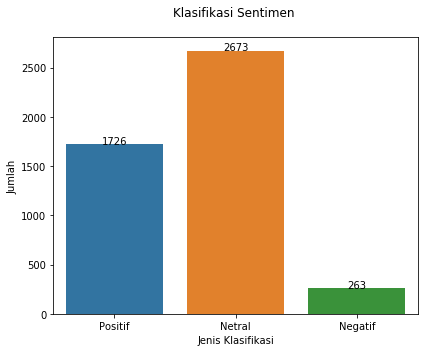

In [153]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = [6,5]
plt.rcParams["figure.autolayout"] = True
x = ['Positif', 'Netral', 'Negatif',]
y = [1726,2673, 263]
percentage = [1726,2673, 263]
ax = sns.barplot(x=x, y=y)
patches = ax.patches
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width()/2
    y = patches[i].get_height()+.5
    ax.annotate('{:}'.format(percentage[i]), (x, y), ha='center')
    
plt.title('Klasifikasi Sentimen \n')
plt.xlabel('Jenis Klasifikasi')
plt.ylabel('Jumlah')    
plt.show()